In [1]:
# Importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.preprocessing import preprocesar_datos, guardar_datos_preprocesados

# 1. Carga de datos
print('Cargando datos...')
df = pd.read_csv('demanda_producto.csv', sep=';') # raw data

Cargando datos...


In [2]:
# 2. Información básica del dataset
print("=== Información básica del dataset ===")
df.info()

=== Información básica del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95060 entries, 0 to 95059
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Product_Category   95060 non-null  object
 1   Subcategory        95060 non-null  object
 2   Material_Category  95060 non-null  object
 3   Material_Type      95060 non-null  object
 4   Thickness          95060 non-null  object
 5   Waterproof_Rating  95060 non-null  object
 6   Thermal_Rating     95060 non-null  object
 7   Color_Family       95060 non-null  object
 8   Pattern            95060 non-null  object
 9   Style              95060 non-null  object
 10  Season             95060 non-null  object
dtypes: object(11)
memory usage: 8.0+ MB


In [3]:
# 3. Visualización de las primeras filas
print("=== Primeras 5 filas ===")
df.head()

=== Primeras 5 filas ===


,Product_Category,Subcategory,Material_Category,Material_Type,Thickness,Waterproof_Rating,Thermal_Rating,Color_Family,Pattern,Style,Season
0,Tops,Blusas,Técnico,Dri-FIT,Medio,No,Alto,Oscuro,Sólido,Formal,Winter
1,Tops,Sudaderas,Natural,Algodón,Ligero,No,Bajo,Vibrante,Estampado,Deportivo,Summer
2,Dresses,Vestidos Formal,Natural,Algodón,Ligero,No,Bajo,Neutro,Estampado,Playa,Summer
3,Outerwear,Chaquetas,Técnico,Gore-Tex,Grueso,Impermeable,Muy Alto,Oscuro,Sólido,Formal,Winter
4,Dresses,Vestidos Playa,Natural,Lino,Ligero,No,Bajo,Vibrante,Rayas,Deportivo,Summer


In [4]:
# 4. Análisis de valores nulos
print("=== Análisis de valores nulos ===")
nulos = df.isnull().sum()
nulos[nulos > 0]

=== Análisis de valores nulos ===


Series([], dtype: int64)

In [5]:
# 5. Estadísticas descriptivas
print("=== Estadísticas descriptivas ===")
df.describe()

=== Estadísticas descriptivas ===


,Product_Category,Subcategory,Material_Category,Material_Type,Thickness,Waterproof_Rating,Thermal_Rating,Color_Family,Pattern,Style,Season
count,95060,95060,95060,95060,95060,95060,95060,95060,95060,95060,95060
unique,7,25,3,10,3,3,4,4,5,4,4
top,Outerwear,Pantalones,Natural,Lana,Medio,No,Bajo,Neutro,Sólido,Casual,Winter
freq,17706,6996,38334,14816,34334,48106,34039,26285,28678,28938,33271


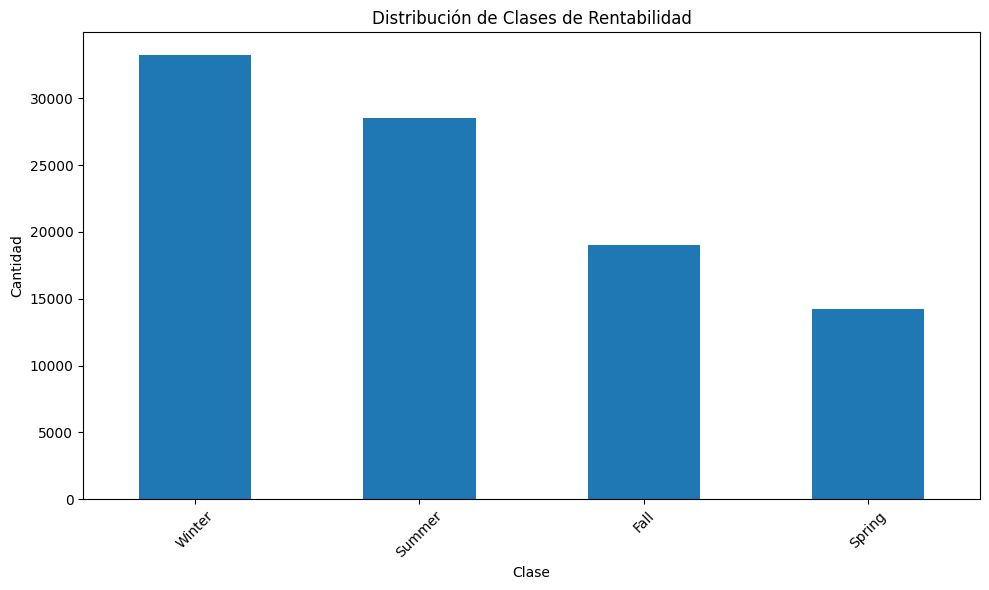

In [6]:
# 6. Visualización de la distribución de clases
plt.figure(figsize=(10, 6))
df['Season'].value_counts().plot(kind='bar')
plt.title('Distribución de Clases de Rentabilidad')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# 7. Preprocesamiento de datos
print("=== Realizando preprocesamiento ===")
resultados = preprocesar_datos(df)

=== Realizando preprocesamiento ===

=== Iniciando preprocesamiento de datos ===

Información inicial del dataset:
Dimensiones: (95060, 11)

Distribución inicial de temporadas:
Season
Winter    33271
Summer    28518
Fall      19012
Spring    14259
Name: count, dtype: int64

Tratamiento de valores nulos...

Separando columnas numéricas y categóricas...

Aplicando One-Hot Encoding a variables categóricas...
One-hot encoding aplicado a: Product_Category, Subcategory, Material_Category, Material_Type, Thickness, Waterproof_Rating, Thermal_Rating, Color_Family, Pattern, Style

Aplicando escalamiento a variables numéricas...

Codificando variable objetivo...
Mapeo de temporadas: {'Fall': np.int64(0), 'Spring': np.int64(1), 'Summer': np.int64(2), 'Winter': np.int64(3)}

Separando features y target...

Realizando división train-test...

=== Preprocesamiento completado ===
Dimensiones finales:
X_train: (76048, 68)
X_test: (19012, 68)


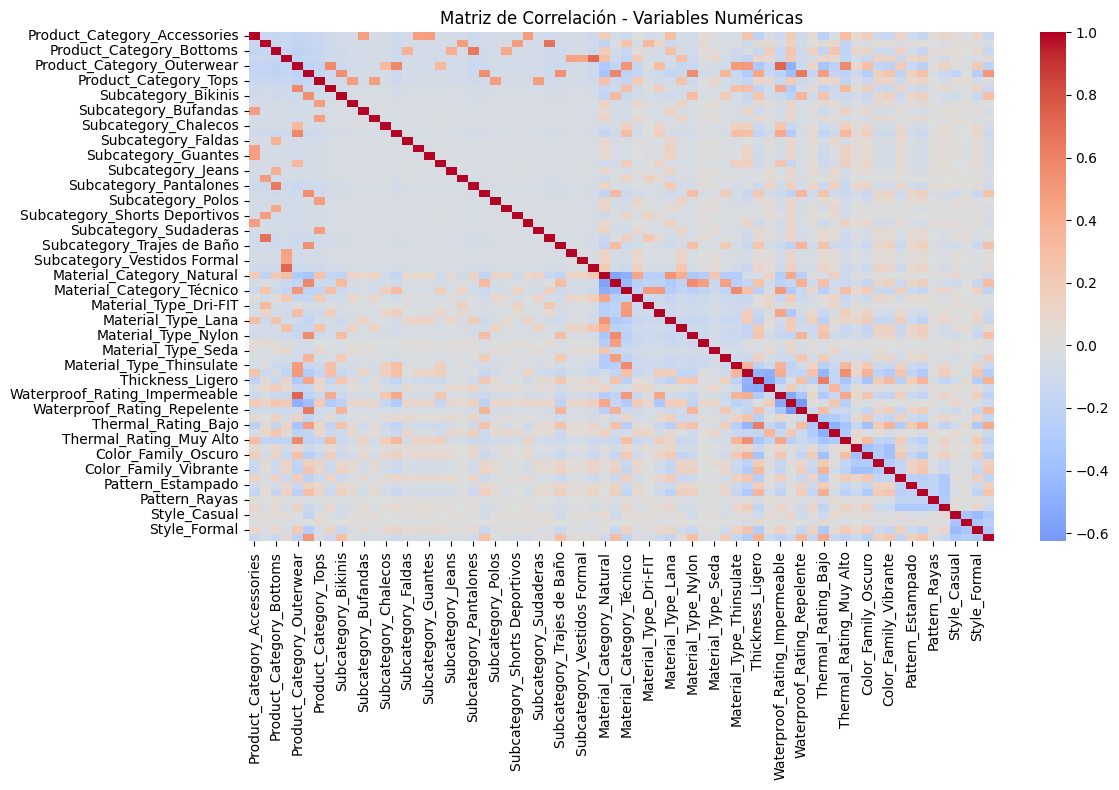

In [13]:
# 8. Matriz de correlación
numerical_cols = resultados['df_completo'].select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(resultados['df_completo'][numerical_cols].corr(), cmap='coolwarm', center=0)
plt.title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.show()

In [9]:
# 9. Verificación del preprocesamiento - Distribución de clases
print("=== Distribución de clases en el conjunto de entrenamiento ===")
clases_unicas, conteos = np.unique(resultados['y_train'], return_counts=True)
for clase, conteo in zip(clases_unicas, conteos):
    print(f"Clase {clase}: {conteo} muestras")

=== Distribución de clases en el conjunto de entrenamiento ===
Clase 0: 15210 muestras
Clase 1: 11407 muestras
Clase 2: 22814 muestras
Clase 3: 26617 muestras


In [10]:
# 10. Verificación del preprocesamiento - Formas de los conjuntos
print("=== Formas de los conjuntos de datos ===")
print(f"X_train: {resultados['X_train'].shape}")
print(f"X_test: {resultados['X_test'].shape}")
print(f"y_train: {resultados['y_train'].shape}")
print(f"y_test: {resultados['y_test'].shape}")

=== Formas de los conjuntos de datos ===
X_train: (76048, 68)
X_test: (19012, 68)
y_train: (76048,)
y_test: (19012,)


In [11]:
# 11. Verificación del preprocesamiento - Rango de valores
print("=== Rango de valores después del escalamiento (X_train) ===")
for columna in resultados['X_train'].columns:
    min_val = resultados['X_train'][columna].min()
    max_val = resultados['X_train'][columna].max()
    print(f"{columna}: [{min_val:.2f}, {max_val:.2f}]")

=== Rango de valores después del escalamiento (X_train) ===
Product_Category_Accessories: [0.00, 1.00]
Product_Category_Activewear: [0.00, 1.00]
Product_Category_Bottoms: [0.00, 1.00]
Product_Category_Dresses: [0.00, 1.00]
Product_Category_Outerwear: [0.00, 1.00]
Product_Category_Swimwear: [0.00, 1.00]
Product_Category_Tops: [0.00, 1.00]
Subcategory_Abrigos: [0.00, 1.00]
Subcategory_Bikinis: [0.00, 1.00]
Subcategory_Blusas: [0.00, 1.00]
Subcategory_Bufandas: [0.00, 1.00]
Subcategory_Camisetas: [0.00, 1.00]
Subcategory_Chalecos: [0.00, 1.00]
Subcategory_Chaquetas: [0.00, 1.00]
Subcategory_Faldas: [0.00, 1.00]
Subcategory_Gorros: [0.00, 1.00]
Subcategory_Guantes: [0.00, 1.00]
Subcategory_Impermeables: [0.00, 1.00]
Subcategory_Jeans: [0.00, 1.00]
Subcategory_Leggings: [0.00, 1.00]
Subcategory_Pantalones: [0.00, 1.00]
Subcategory_Pareos: [0.00, 1.00]
Subcategory_Polos: [0.00, 1.00]
Subcategory_Shorts: [0.00, 1.00]
Subcategory_Shorts Deportivos: [0.00, 1.00]
Subcategory_Sombreros: [0.00, 1.

In [12]:
# 12. Guardar datos preprocesados
print("=== Guardando datos preprocesados ===")
guardar_datos_preprocesados(resultados)
print("¡Proceso completado con éxito!")

=== Guardando datos preprocesados ===
Guardando datos principales...
Guardando encoders...
Guardando archivos CSV...
Guardado completado exitosamente en: c:\Users\patri\Documents\workspaces\python\PROYECT-BI\datos

Archivos guardados:
- dataset_procesado.csv
- preprocessors.pkl
- test_processed.csv
- train_processed.csv
- X_test.npy
- X_train.npy
- y_test.npy
- y_train.npy
¡Proceso completado con éxito!
